The client is a retail bankinkg institution. Term deposite are major source of income for the bank.

We are provided with client data such as: age of client, their job type, their marital status etc. Along with the client data, we are also provided with the information of the call such as duration of the call, day and month of the call etc.

Given these information our task is to predict if the client will subscribe to term deposite or not 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Viewing train data columns
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
# Viewing test data columns 
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
# Viewing total number of rows and columns in train and test dataset
train.shape, test.shape

((31647, 18), (13564, 17))

In [6]:
# Viewing datatypes of train dataset
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see job, marital, education, default, housing, loan, contact, month, poutcome and subscribed are categorical variables

Whereas ID, age, balance, day, duration, campaign, pdays and previous are continuous variables.

In [7]:
# Viewing datatypes of test dataset
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

We can see job, marital, education, default, housing, loan, contact, month and poutcome are categorical variables.

Whereas ID, age, balance, day, duration, campaign, pdays and previous are continuous variables.

Also we can notice that subscribed is the target variable

In [8]:
# Viewin first 5 rows of train dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [9]:
# Viewing first 5 rows of test dataset
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# Univariate Analysis

In [10]:
# Frequency of subscribed column
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
# Normalizing the subscribed column
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

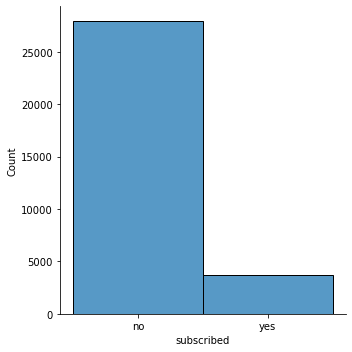

In [12]:
# Viewing subscribed column on bar graph
sns.displot(x='subscribed',data=train)

We can see 3715 clients have subscribed that is 12%

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

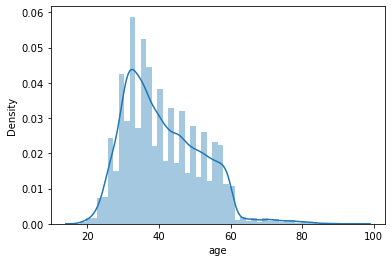

In [13]:
# Viewing age column
sns.distplot(train["age"])

We can see most of the clients fall between the age of 20 and 60

In [14]:
# Viewing frequency of job column
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [15]:
# Normalizing frequency of job column
train['job'].value_counts(normalize=True)

blue-collar      0.216197
management       0.209783
technician       0.167694
admin.           0.114734
services         0.091731
retired          0.049736
self-employed    0.035485
entrepreneur     0.031851
unemployed       0.028597
housemaid        0.027617
student          0.020065
unknown          0.006509
Name: job, dtype: float64

<AxesSubplot:>

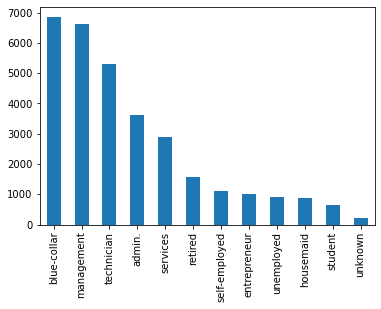

In [16]:
 # Viewing frequency of job column on bar graph
train['job'].value_counts().plot.bar()

We can see most of the clients have blue collared jobs and there are very few students, housemaids and unemployed clients

In [17]:
# Viewing frequency of default column 
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [18]:
# Viewing frequency of default column 
train['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

<AxesSubplot:>

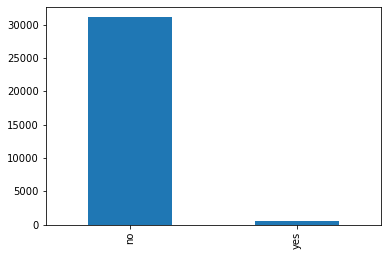

In [19]:
# Viewing frequency of default column on bar graph
train['default'].value_counts().plot.bar()

We can see almost 98% of the clients do not have default history

In [20]:
# Viewing frequency of marital column
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [21]:
# Normalizing frequency of marital column
train['marital'].value_counts(normalize=True)

married     0.603375
single      0.281922
divorced    0.114703
Name: marital, dtype: float64

<AxesSubplot:>

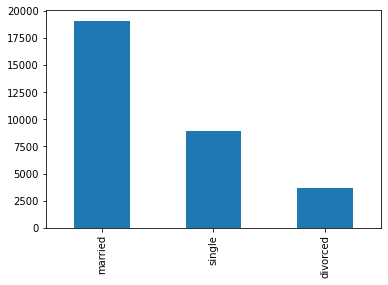

In [22]:
# Viewing frequency of marital column on bar graph
train['marital'].value_counts().plot.bar()

We can see almost 60% of the clients are married

In [23]:
# Viewing frequency of education column
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [24]:
# Normalizing frequency of education column
train['education'].value_counts(normalize=True)

secondary    0.512655
tertiary     0.293898
primary      0.151926
unknown      0.041521
Name: education, dtype: float64

<AxesSubplot:>

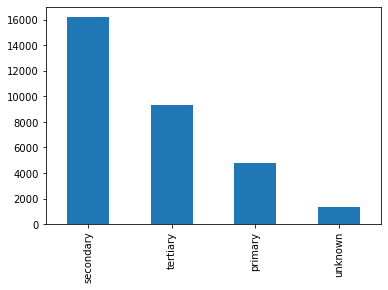

In [25]:
# Viewing frequency of education column on bar graph
train['education'].value_counts().plot.bar()

We can see approx 51% clients have attended secondary education

# Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<AxesSubplot:xlabel='job'>

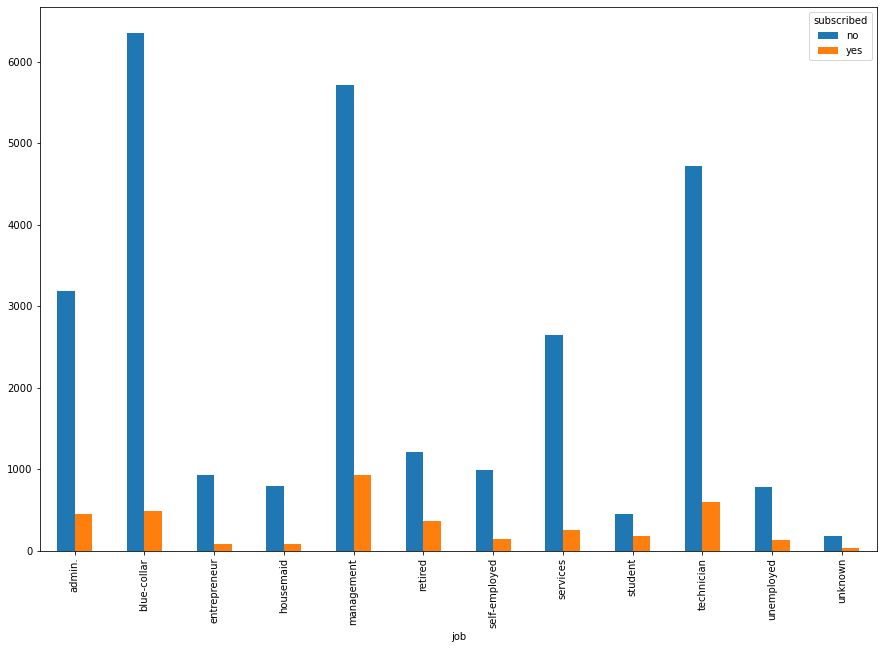

In [26]:
# Analysis of subscription based on job type
print(pd.crosstab(train['job'],train['subscribed']))

pd.crosstab(train['job'],train['subscribed']).plot.bar(figsize=(15,10))

We can see management employees, technicians, blue collared and admin. clients have taken more subscriptions than any other job type but we can also see there are much more clients in the same job category has not taken subscription so lets check check ratio of each job with subscription taken and subscription not taken

Text(0, 0.5, 'Percentage')

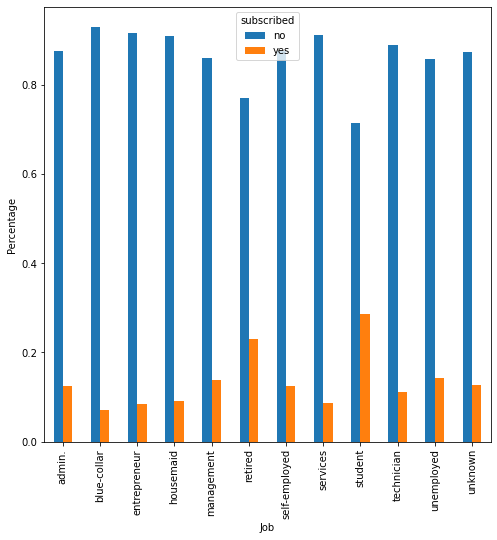

In [27]:
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

We can see students and retired people have higher chances of subscribing to a term deposite which is surprising as we have seen earlier students generally do not subscribe to a term deposite. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'subscribed')

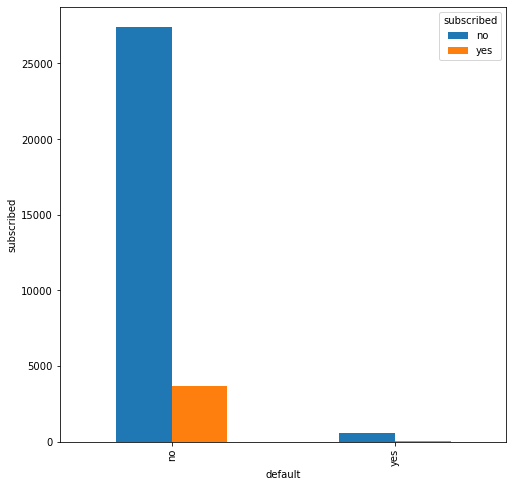

In [28]:
# Analysis of subscription based on default history
print(pd.crosstab(train['default'],train['subscribed']))

pd.crosstab(train['default'],train['subscribed']).plot.bar(figsize=(8,8))
plt.ylabel("subscribed")

We can observe clients with previous default history have taken less subscription in comparison with clients with no previous default history.

Text(0, 0.5, 'Percentage')

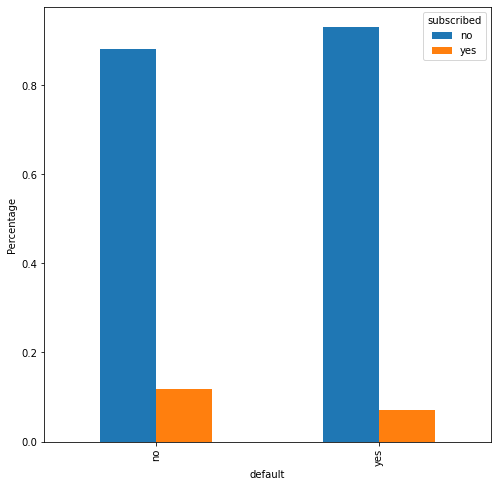

In [29]:
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

By referring to ratio of subscription and default we can see clients with no previous default history are more likely to have subscription and clients with previous default history have less chances of getting subscription.

subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


<AxesSubplot:xlabel='education'>

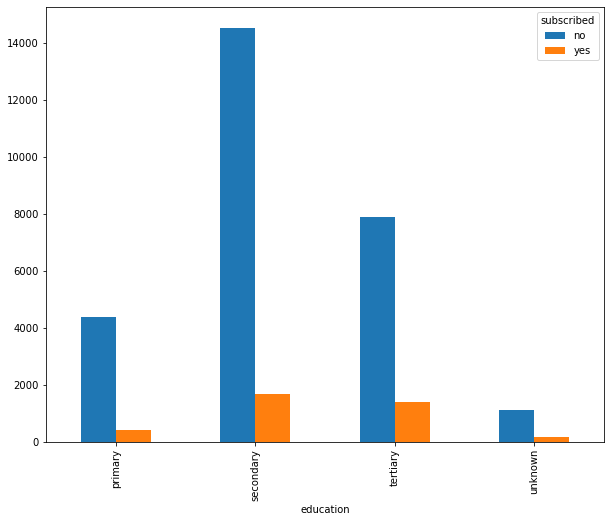

In [30]:
# Analysis of subscription based on education
print(pd.crosstab(train['education'],train['subscribed']))
pd.crosstab(train['education'],train['subscribed']).plot.bar(figsize=(10,8))

We can see clients with secondary education have taken more subscription in comparison with others

Text(0, 0.5, 'Percentage')

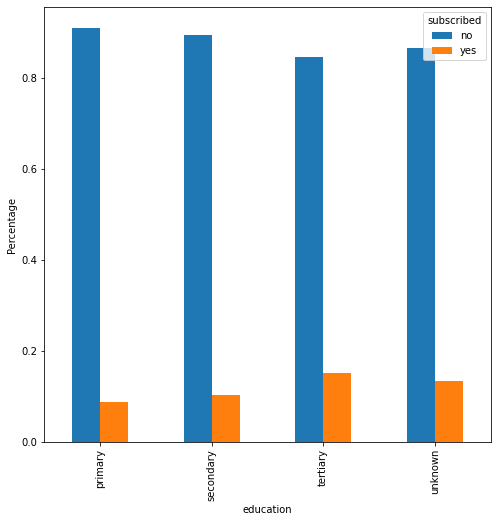

In [31]:
education=pd.crosstab(train['education'],train['subscribed'])
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(8,8))
plt.xlabel('education')
plt.ylabel('Percentage')

Here we can observe that clients with tertiary education are more likely to subscribe than that of secondary education. This is because of less number of clients having tertiary education 

subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


<AxesSubplot:xlabel='marital'>

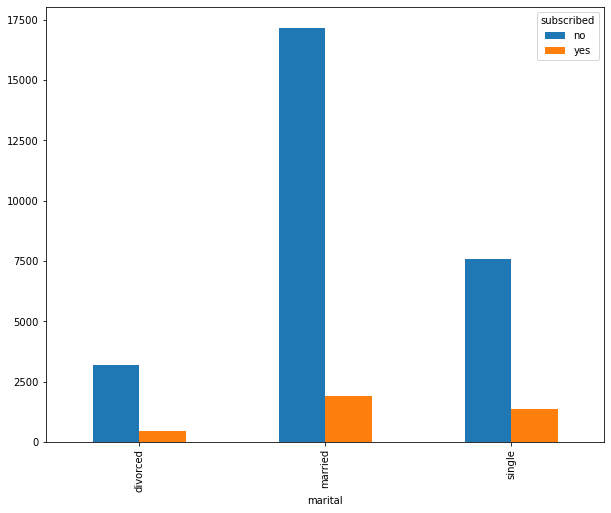

In [32]:
# Analysis of subscription based on marital status
print(pd.crosstab(train['marital'],train['subscribed']))
pd.crosstab(train['marital'],train['subscribed']).plot.bar(figsize=(10,8))

We can observe married clients have more subscription any the rest

Text(0, 0.5, 'Percentage')

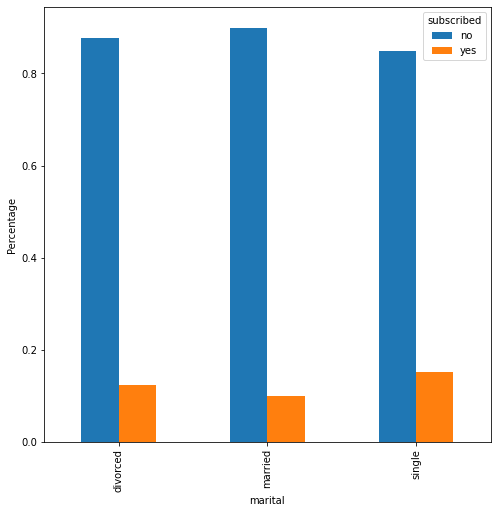

In [33]:
marital=pd.crosstab(train['marital'],train['subscribed'])
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar",figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

Here we can observe that single clients are more likely to subscribe and married clients are least likely to subscribe

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [34]:
# We have changed yes and no values of subscribed feature to 1 and 0 respectively 
train['subscribed'].replace('no', 0, inplace=True)
train['subscribed'].replace('yes', 1, inplace=True)

<AxesSubplot:>

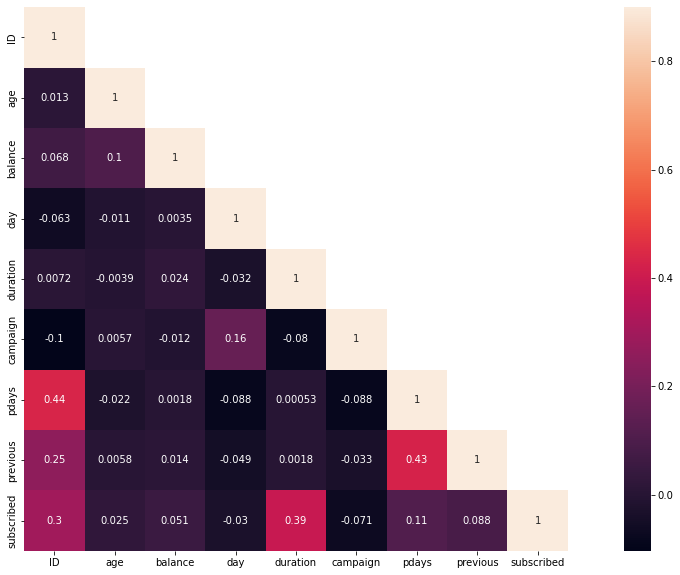

In [35]:
corr=train.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True)

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [36]:
# Looking for missing values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We can see there are no missing values in the dataset

# Building the Model

We will start to build our predictive model to predict whether a client will subscribe to a term deposite or not.

As the sklearn model takes only numerical values, we wil convert the categorical variables into numerical values using dummies.

We will remove the ID variable as they are unique values and also remove the target variable and keep it in a separate variable.

In [37]:
target=train['subscribed']
train = train.drop('subscribed',1)

C:\Users\hp\AppData\Local\Temp\ipykernel_18600\2842096407.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('subscribed',1)


In [38]:
# Applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now our data is ready. We will build our model and will check its performance. Since this is a classification problem, we will use logistic regression to build our model

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Assigning logistic regression model and fittting the model
LogReg= LogisticRegression()
LogReg.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now we will make prediction on our validation set using the model we have built

In [43]:
prediction = LogReg.predict(X_val)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Now we have our predictions lets check the accuracy of the prediction

In [44]:
from sklearn.metrics import accuracy_score,classification_report

In [45]:
# Checking accuracy score
acc=accuracy_score(y_val,prediction)
acc

0.8873617693522907

In [46]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5608
           1       0.51      0.21      0.30       722

    accuracy                           0.89      6330
   macro avg       0.71      0.59      0.62      6330
weighted avg       0.86      0.89      0.87      6330



We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Assigning Decision tree model 
DecTree=DecisionTreeClassifier(max_depth=8, random_state=25)

In [49]:
# Fitting the tree
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=25)

In [50]:
# Making prediction on the validation set using decision tree classifier
predict=DecTree.predict(X_val)

In [51]:
# Checking accuracy score
vcc=accuracy_score(y_val,predict)
vcc

0.9058451816745655

In [52]:
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5608
           1       0.60      0.53      0.56       722

    accuracy                           0.91      6330
   macro avg       0.77      0.74      0.76      6330
weighted avg       0.90      0.91      0.90      6330



We got an accuracy of  90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [53]:
test = pd.get_dummies(test)

In [63]:
test_prediction=DecTree.predict(test)
test_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Finally, we will save these predictions into a csv file.

In [55]:
submission = pd.DataFrame()

In [56]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [57]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [58]:
submission.to_csv('submission.csv', header=True, index=False)